In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

It's worth first pausing a moment to consider what exactly a differential equation is. In the 1D case, you can imagine your common $x$ and $y$ axes. A differential equation can be interpretted as the following:

* *Each point in the $(x,y)$ plane is associated with a slope $dy/dx = f(x,y)$.*

I can start at a particular value of $(x,y) = (x_0, y_0)$. This  is my initial condition, and is associated with an initial slope $dy/dx = f(x_0,y_0)$. I follow this slope to get new values of $(x,y)$. But as $x$ and $y$ change, so too does the slope $dy/dx$ that I need to follow.

In [2]:
def dydx(x,y):
    return x**2 * np.sin(y)

Plot a differential equation

In [3]:
x = np.linspace(0,2,10)
y = np.linspace(0,2*np.pi,10)
x_mg, y_mg = np.meshgrid(x,y)
dydx_mg = dydx(x_mg, y_mg)

Video for meshgrid: https://www.youtube.com/watch?v=sHwdoSQpMFQ

Text(0, 0.5, 'y')

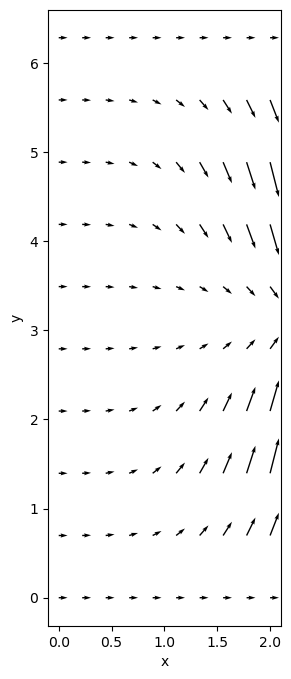

In [4]:
plt.figure(figsize=(3,8))
plt.quiver(x_mg, y_mg, 1, dydx_mg)
plt.xlabel('x')
plt.ylabel('y')

Depending where I start $(x_0, y_0)$, I simply follow the arrows to get the solution to my differential equation. That's where the computer comes in.

# First Order Differential Equations

Lets consider solving the differential equation above: 

$$\frac{dy}{dx} = x^2 \sin(y)$$

There are two things we need to solve this numerically:
1. We need to write a function that takes in $x$ and $y$ and returns $dy/dx$. This is simply the differential equation
2. We feed this function, along with our initial conditions, into the `solve_ivp` method. We also need to specify the the range of $x$ we want it to solve for

1. Define function

In [5]:
def dydx(x,y):
    return x**2 * np.sin(y)

2. Initial conditions

In [6]:
x_span = [0,2]
y0 = [5.5]
solution = solve_ivp(dydx, x_span, y0, t_eval=np.linspace(0,2,100))

Now we can examine the solution. The convention of the solver is that $t$ always represents the independent variable and $y$ the dependent

In [13]:
solution.t

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [14]:
solution.y

array([[5.5       , 5.49999806, 5.49998449, 5.49994764, 5.4998759 ,
        5.49975759, 5.49957767, 5.49930631, 5.49893394, 5.49845408,
        5.49785966, 5.49714307, 5.4962961 , 5.49530998, 5.49417539,
        5.4928824 , 5.49142054, 5.48977877, 5.48794545, 5.4859084 ,
        5.48365485, 5.48117148, 5.47844438, 5.47545908, 5.47220053,
        5.46865312, 5.46480066, 5.4606264 , 5.45611301, 5.45124259,
        5.44599668, 5.44035624, 5.43430166, 5.42781276, 5.4208688 ,
        5.41344844, 5.4055298 , 5.39709042, 5.38810726, 5.37855673,
        5.36841465, 5.35765628, 5.3462563 , 5.33418882, 5.3214274 ,
        5.307945  , 5.29371403, 5.27870632, 5.26289314, 5.24624517,
        5.22873253, 5.21032479, 5.19099091, 5.17069931, 5.14941782,
        5.12711371, 5.10376804, 5.07934854, 5.05380803, 5.02710718,
        4.9992145 , 4.97010638, 4.93976704, 4.90818855, 4.87537086,
        4.84132174, 4.80605684, 4.76959963, 4.73198147, 4.69324155,
        4.65342692, 4.61259247, 4.57080095, 4.52

Note the shape of each array. Why does $y$ have the extra dimension with 1 entry? Well it's because `solve_ivp` is designed such that $y$ can be a vector; in our case, since we're solving a scalar differential equations, we can think of it as a 1 dimensional vector.

In [15]:
x_solution, y_solution = solution.t, solution.y[0]

Now we can plot our solution. We'll put the quiver plot in the background, to show our solution does indeed follow the arrows.

Text(0, 0.5, 'y')

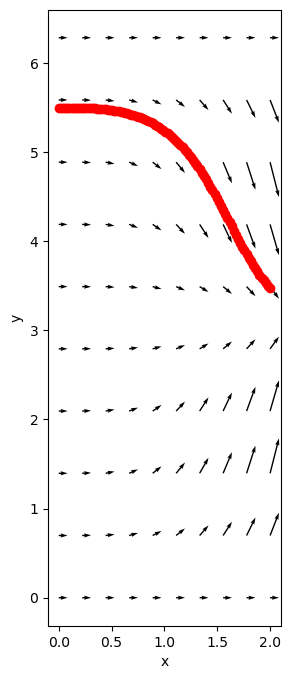

In [16]:
plt.figure(figsize=(3,8))
plt.quiver(x_mg, y_mg, 1, dydx_mg)
plt.plot(x_solution, y_solution, color='r', ls='--', marker='o')
plt.xlabel('x')
plt.ylabel('y')

Notice that it has manually chosen the $x$ values at which the equation is solved. We can specify a manual array, if we like, by giving the `t_eval` argument to the differential equation solver.

# Systems of First Order Differential Equations

Sometimes, multiple variables are interconnected in differential equations. Consider $t$ as the independent variable, and a population of predators $y$ and prey $x$. The rate of change of the prey is going to depend on the number of predators there are, and the rate of change of the predators is going to depend how much prey is available to eat. The Lotka-Volterra Equations say

$$\frac{dx}{dt} = x - \alpha xy$$
$$\frac{dy}{dt} = -y + \beta xy$$


$\alpha$ and $\beta$ are interaction terms; in the absence of interaction betwwen the species, predators die off (exponential decay) and prey multiply (exponentiall increase).

How does one solve the two of these simultaneously? The `solve_ivp` method, as we know, can solve vector differential equations. We can express the two equations above as

$$\frac{d}{dt}\begin{bmatrix} x\\ y \end{bmatrix} =\begin{bmatrix} x - \alpha xy\\ -y+\beta xy \end{bmatrix} $$

Defining $\vec{S} = [x,y]$ and $\vec{f}(\vec{S}) = [x - \alpha xy, -y+\beta xy]$ we get

$$\frac{d\vec{S}}{dt} = \vec{f}(\vec{S})$$

To solve problems now, we need to write a function for $d\vec{S}/dt$, remembering that $\vec{S}$ is a vector

In [17]:
alpha = 0.04
beta = 0.01

In [18]:
def dSdt(t,S):
    x, y = S
    return [x - alpha*x*y,
            -y + beta*x*y]

Its a function that takes in $t$ and a vector $\vec{S}$ and returns the vector derivative

In [19]:
dSdt(2, [50,5])

[40.0, -2.5]

Now we simply feed it in to the solver, like before:

In [20]:
t_span = [0,30]
t_eval = np.linspace(t_span[0], t_span[1], 100)
y0 = [50,5]
solution = solve_ivp(dSdt, t_span, y0, t_eval=t_eval)

Now we can examine the solution

In [24]:
solution.t.shape

(100,)

The outer dimesion of `solution.y` is 2, providing us the solution to the prey and predator as a function of time

Text(0, 0.5, 'Number of Species')

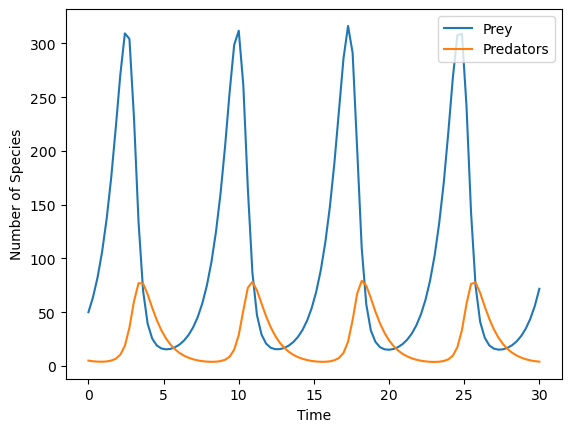

In [29]:
plt.plot(solution.t, solution.y[0], label='Prey')
plt.plot(solution.t, solution.y[1], label='Predators')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Number of Species')

**The Golden Rule For Systems of ODES**

1. Define $\vec{S}=[x_1, x_2, ...]$ where $x_1$, $x_2$, ... $x_n$ are the dependent variables
2.  Write a python function (I usually call it `dSdt`) that takes in the independent variable `t` and a vector `S`, and returns $dS/dt$.
3. Feed in the function `dSdt` with all initial conditions to `solve_ivp`

# Higher Order Differential Equations

**Python does not have functions to directly solve second order ODEs**. 
* But **any second order ODE can be converted into two first order ODEs**.

Consider 

$$\ddot{x} = -\dot{x}^2 + \sin(x)$$

We can convert this into two first order ODEs as follows:

* Take $x$ (this is what we're trying to solve for). Then define $\dot{x}=v$ so that $v$ becomes a new variable.
* Note that $\dot{x}=v$ is one differential equation
* Since $\dot{v} = \ddot{x} = -\dot{x}^2 + \sin(x) = -v^2 + \sin(x)$ we get another differential equation

Our two equations:

$$\dot{x} = v$$
$$\dot{v} = -v^2 + \sin(x)$$

These are two coupled first order equations. They require an initial condition ($x_0$ and $v_0$)

Letting $\vec{S} = [x,v]$ we define our derivative `dSdt`. We also add some initial conditions

In [30]:
def dSdt(t, S):
    x, v = S
    return [v,
           -v**2 + np.sin(x)]
x_0 = 0
v_0 = 5
S_0 = (x_0, v_0)

Solve the ODE

In [31]:
t_span = (0,1)
t_eval = np.linspace(t_span[0], t_span[1], 100)
solution = solve_ivp(dSdt, t_span, y0=S_0, t_eval=t_eval)

Get solutions for both $x$ and $v$

In [32]:
x_sol = solution.y[0]
v_sol = solution.y[1]

Plot

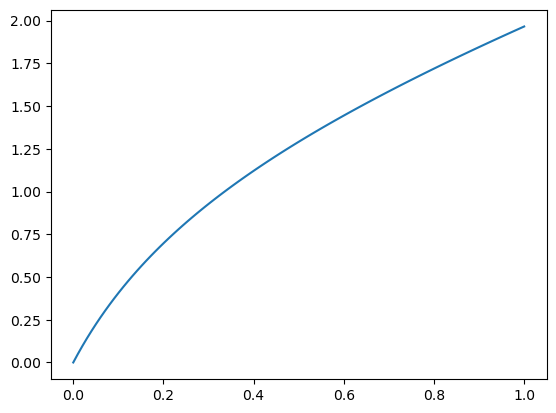

In [34]:
plt.plot(t_eval, x_sol)
#plt.plot(t_eval, v_sol)

This process can be repeated for third order (required defining two new variables) fourth order (requires defining three new variables) and so on...

**Example:** Two coupled third order equations

$$x_1'''= -{x_2''}^2 + x_2$$
$$x_2'''= -10\cos(2\pi x_1' t)$$

Define 
* $v_1 = {x_1'}$
* $v_2 = {x_2'}$
* $a_1 = {x_1''} = {v_1'}$
* $a_2 = {x_2''} = {v_2'}$

These make up four differential equations. Then noting that ${a_1'} = {x_1'''}$ and ${a_2'} = {x_2''''}$ we get

* ${a_1'} = -{a_2}^2 + x_2$
* ${a_2'} = -10\cos(2\pi v_1 t)$

Then

$$\vec{S} = \begin{bmatrix} x_1\\ v_1 \\ a_1 \\ x_2 \\ v_2 \\ a_2 \end{bmatrix} \hspace{10mm} \implies \hspace{10mm} \frac{d\vec{S}}{dt} = \begin{bmatrix} \dot{x_1}\\ \dot{v_1} \\ \dot{a_1} \\ \dot{x_2} \\ \dot{v_2} \\ \dot{a_2} \end{bmatrix} =  \begin{bmatrix} v_1\\ a_1 \\ -{a_2}^2 + x_2 \\ v_2 \\ a_2 \\  -10\cos(2\pi v_1 t) \end{bmatrix}$$

Lets define the system of ODEs:

In [41]:
def dSdt(t, S):
    x1, v1, a1, x2, v2, a2 = S
    return [v1,
            a1,
            -a2**2 + x2,
            v2,
            a2,
            - 10*np.cos(10*np.pi*v1*t)]
x1_0 = 1
v1_0 = 0
a1_0 = 0
x2_0 = 0
v2_0 = 0
a2_0 = 0
S_0 = (x1_0, v1_0, a1_0, x2_0, v2_0, a2_0)

Solve the system:

In [42]:
t_span = (0,1)
t_eval = np.linspace(t_span[0], t_span[1], 100)
solution = solve_ivp(dSdt, t_span, y0=S_0, t_eval=t_eval)

In [43]:
solution.y.shape

(6, 100)

Plot the solution of $x_1$

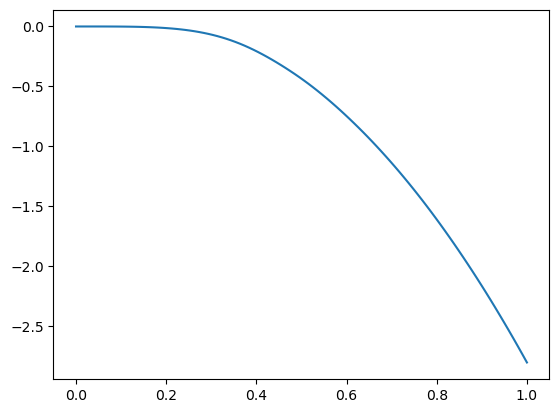

In [46]:
plt.plot(t_eval,solution.y[1])